In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dtst = pd.read_csv("DT/Advertising.csv") #load dataset

In [3]:
dtst.head() # printing first 5 sample values

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
dtst.shape # shape of values

(200, 5)

In [5]:
### features

xt=dtst.TV
xr=dtst.radio
xn=dtst.newspaper

In [6]:
y=dtst.sales #target 

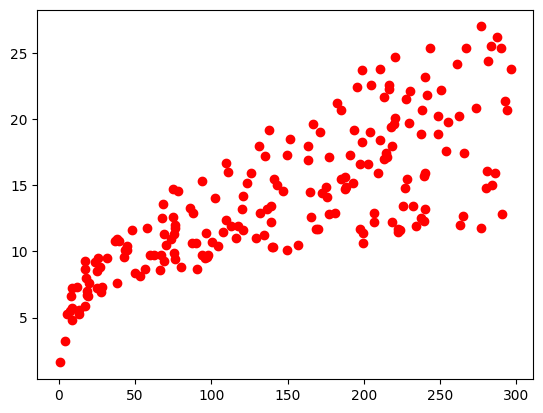

In [7]:
plt.plot(xt,y,"ro") #values of tv

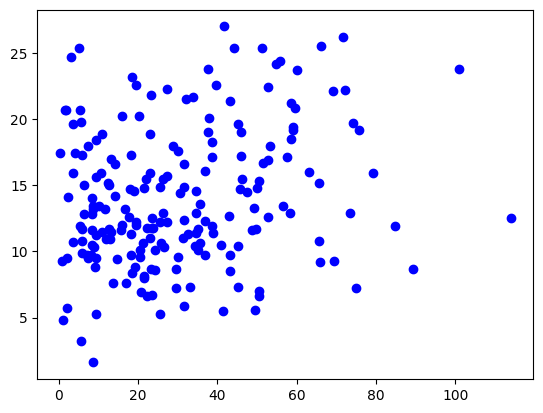

In [8]:
plt.plot(xn,y,"bo") #values of newspaper

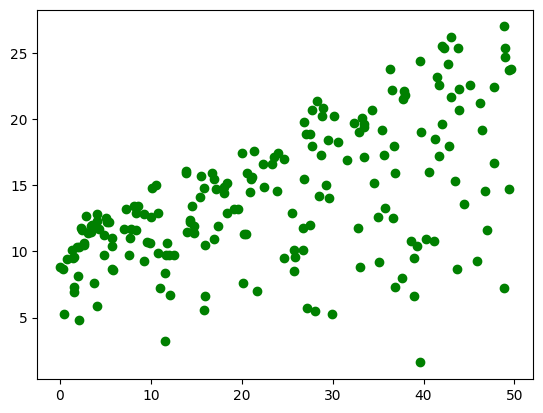

In [9]:
plt.plot(xr,y,"go") #values of radio

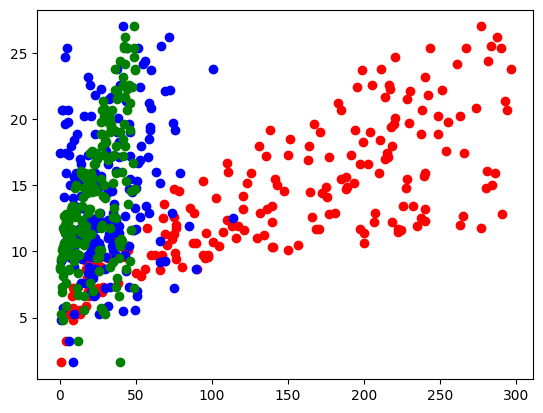

In [10]:
plt.plot(xt,y,"ro",xn,y,"bo",xr,y,"go") #total values

In [11]:
features=["TV","newspaper","radio"]
X=dtst[features]

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1) #test train splitting

The weights $ \beta $ can be found by

$$
\beta = (X^T X)^{-1} X^T y
$$

$\beta$ is the weight <br>
$ X $ is the input feature matrix<br>
$ X^T $ is the transpose<br>
$y$ is the Target<br>
$(X^T X)^{-1}$ is the inverse of the covariance matrix <br>

$
RSS = \sum (y_{\text{train}} - \hat{y})^2 $
<br> <br> $
TSS = \sum (y_{\text{train}} - \bar{y})^2 $
<br><br> $
R^2 = 1 - \frac{RSS}{TSS} $
<br><br> $
RSE = \sqrt{\frac{RSS}{n - p - 1}} $
<br><br> $
F = \frac{(TSS - RSS) / p}{RSS / (n - p - 1)} $
<br>


In [13]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train] #adding the intercept to train data
X_test = np.c_[np.ones(X_test.shape[0]), X_test] #adding the intercept to test data


y_train = y_train.values #to numpy array
y_test = y_test.values #to numpy array


beta = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)  # the above equation using numpy


y_pred = X_train @ beta #predicting 


RSS = np.sum((y_train - y_pred) ** 2) 
TSS = np.sum((y_train - np.mean(y_train)) ** 2)
R2 = 1 - RSS / TSS
n, p = X_train.shape[0], X_train.shape[1] - 1 # number of datapoints and predicates
RSE = np.sqrt(RSS / (n - p - 1))
F_statistic = ((TSS - RSS) / p) / (RSS / (n - p - 1))


print(f"Coefficients: {beta}")
print(f"RSS: {RSS}")
print(f"R2: {R2}")
print(f"RSE: {RSE}")
print(f"F-statistic: {F_statistic}")

Coefficients: [2.87696662 0.04656457 0.00345046 0.17915812]
RSS: 463.0187020243702
R2: 0.890307557755665
RSE: 1.7808315396942123
F-statistic: 394.99805326238567


In [14]:
xt = dtst["TV"]   #taking only TV
y = dtst["sales"]  

xt_train, xt_test, y_train, y_test = train_test_split(xt, y, random_state=1)

xt_train = xt_train.values.reshape(-1, 1)
xt_test = xt_test.values.reshape(-1, 1)

X_train = np.c_[np.ones(xt_train.shape[0]), xt_train]  
X_test = np.c_[np.ones(xt_test.shape[0]), xt_test]

beta = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)

y_pred = X_train @ beta

RSS = np.sum((y_train - y_pred) ** 2)  
TSS = np.sum((y_train - np.mean(y_train)) ** 2) 
R2 = 1 - RSS / TSS  
n, p = X_train.shape[0], 1  
RSE = np.sqrt(RSS / (n - p - 1))  
F_statistic = ((TSS - RSS) / p) / (RSS / (n - p - 1))  

print(f"Coefficients: {beta}")
print(f"RSS: {RSS}")
print(f"R2: {R2}")
print(f"RSE: {RSE}")
print(f"F-statistic: {F_statistic}")

Coefficients: [6.91197262 0.04802945]
RSS: 1587.847156140619
R2: 0.623827651655809
RSE: 3.2754689742005083
F-statistic: 245.43668042442778


In [15]:
xt = dtst["newspaper"]   #taking only newspaper
y = dtst["sales"]  

xt_train, xt_test, y_train, y_test = train_test_split(xt, y, random_state=1)

xt_train = xt_train.values.reshape(-1, 1)
xt_test = xt_test.values.reshape(-1, 1)

X_train = np.c_[np.ones(xt_train.shape[0]), xt_train]  
X_test = np.c_[np.ones(xt_test.shape[0]), xt_test]

beta = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)

y_pred = X_train @ beta

# Metrics calculations
RSS = np.sum((y_train - y_pred) ** 2) 
TSS = np.sum((y_train - np.mean(y_train)) ** 2)  
R2 = 1 - RSS / TSS  
n, p = X_train.shape[0], 1  
RSE = np.sqrt(RSS / (n - p - 1)) 
F_statistic = ((TSS - RSS) / p) / (RSS / (n - p - 1))  


print(f"Coefficients: {beta}")
print(f"RSS: {RSS}")
print(f"R2: {R2}")
print(f"RSE: {RSE}")
print(f"F-statistic: {F_statistic}")

Coefficients: [11.76557671  0.06888299]
RSS: 3898.6080970842904
R2: 0.07639185706108453
RSE: 5.1324406087085785
F-statistic: 12.241116464245225


In [16]:
xt = dtst["radio"]  #taking only radio
y = dtst["sales"]  

xt_train, xt_test, y_train, y_test = train_test_split(xt, y, random_state=1)

xt_train = xt_train.values.reshape(-1, 1)
xt_test = xt_test.values.reshape(-1, 1)

X_train = np.c_[np.ones(xt_train.shape[0]), xt_train]  
X_test = np.c_[np.ones(xt_test.shape[0]), xt_test]


beta = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)

y_pred = X_train @ beta

RSS = np.sum((y_train - y_pred) ** 2)  
TSS = np.sum((y_train - np.mean(y_train)) ** 2)  
R2 = 1 - RSS / TSS  
n, p = X_train.shape[0], 1  
RSE = np.sqrt(RSS / (n - p - 1))  
F_statistic = ((TSS - RSS) / p) / (RSS / (n - p - 1))  


print(f"Coefficients: {beta}")
print(f"RSS: {RSS}")
print(f"R2: {R2}")
print(f"RSE: {RSE}")
print(f"F-statistic: {F_statistic}")

Coefficients: [9.33859455 0.19338969]
RSS: 2937.6263521070696
R2: 0.3040553058546194
RSE: 4.455202206794451
F-statistic: 64.6605766881287


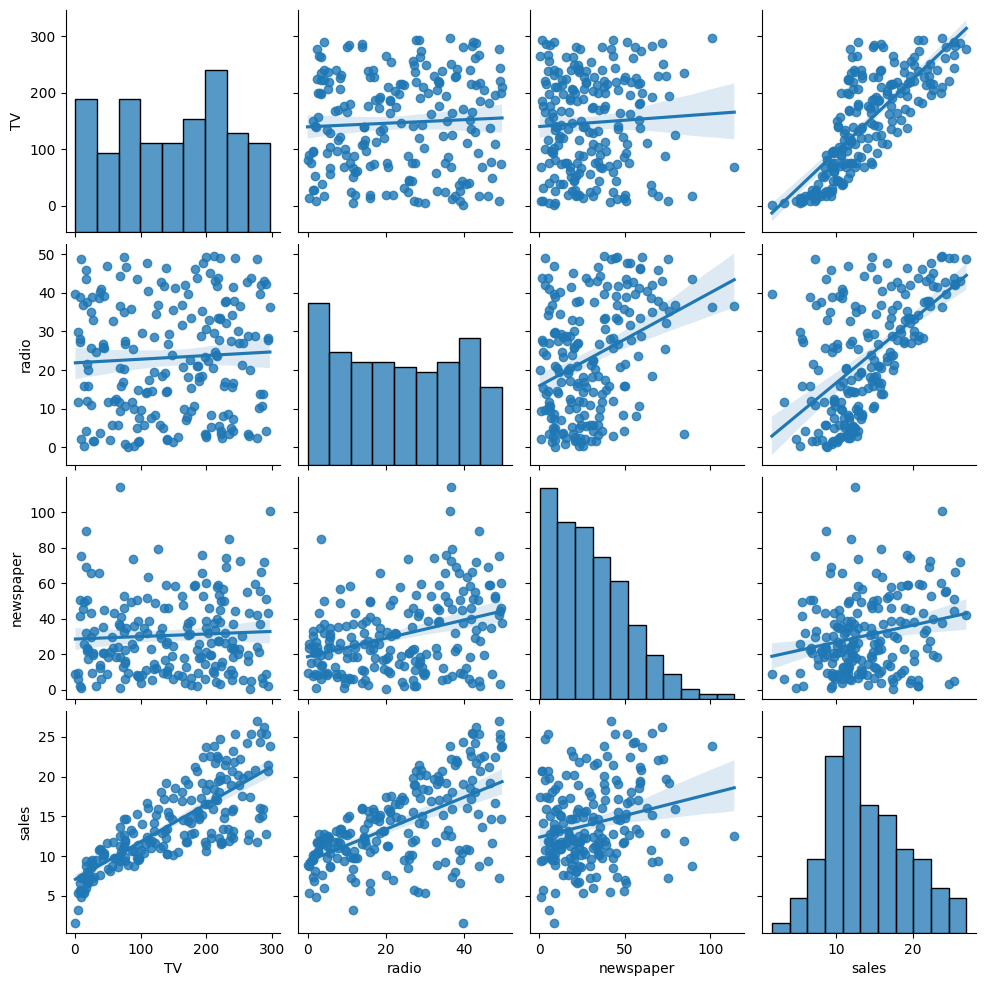

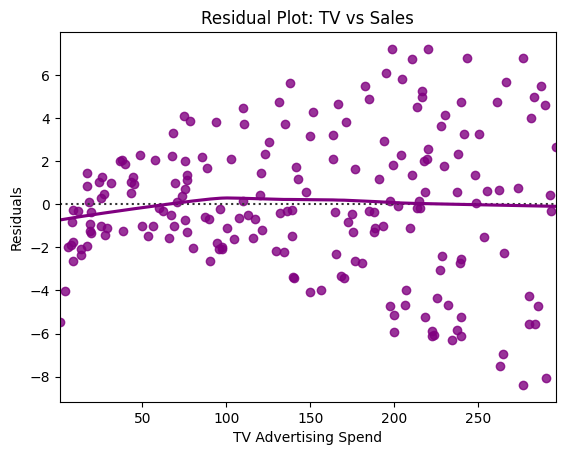

In [17]:
import seaborn as sns


#scatter plot with a regression line, indicating how TV advertising spend impacts sales
#scatter plot with a regression line, indicating how radio advertising spend impacts sales
#scatter plot with a regression line, indicating how newspaper advertising spend impacts sales

sns.pairplot(dtst, vars=["TV", "radio", "newspaper", "sales"], kind="reg")
plt.show()
# identify linear trends and correlations

y_pred_tv = np.c_[np.ones(dtst["TV"].shape[0]), dtst["TV"]] @ beta
residuals = dtst["sales"] - y_pred_tv


#residual plot 
sns.residplot(x=dtst["TV"], y=residuals, lowess=True, color="purple")
plt.title("Residual Plot: TV vs Sales")
plt.xlabel("TV Advertising Spend")
plt.ylabel("Residuals")
plt.show()


In [18]:
features=["TV","newspaper","radio"]
X=dtst[features]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]


y_train = y_train.values
y_test = y_test.values


beta = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)


y_pred = X_test @ beta


Predicted sales: [21.70910292 16.41055243  7.60955058 17.80769552 18.6146359  23.83573998
 16.32488681 13.43225536  9.17173403 17.333853   14.44479482  9.83511973
 17.18797614 16.73086831 15.05529391 15.61434433 12.42541574 17.17716376
 11.08827566 18.00537501  9.28438889 12.98458458  8.79950614 10.42382499
 11.3846456  14.98082512  9.78853268 19.39643187 18.18099936 17.12807566
 21.54670213 14.69809481 16.24641438 12.32114579 19.92422501 15.32498602
 13.88726522 10.03162255 20.93105915  7.44936831  3.64695761  7.22020178
  5.9962782  18.43381853  8.39408045 14.08371047 15.02195699 20.35836418
 20.57036347 19.60636679] 

Actual sales: [23.8 16.6  9.5 14.8 17.6 25.5 16.9 12.9 10.5 17.1 14.5 11.3 17.4 16.7
 13.4 15.9 12.9 12.8  9.5 18.4 10.7 12.5  8.5 11.5 11.9 14.9 10.1 18.9
 19.6 15.9 23.2 11.9 17.3 11.7 20.2 15.5 11.5 11.  22.3  7.6  5.3  8.7
  6.7 19.   5.5 14.6 14.6 21.5 22.6 19.7] 

Loss (Actual - Predicted): [ 2.09089708  0.18944757  1.89044942 -3.00769552 -1.0146359   1.66426002


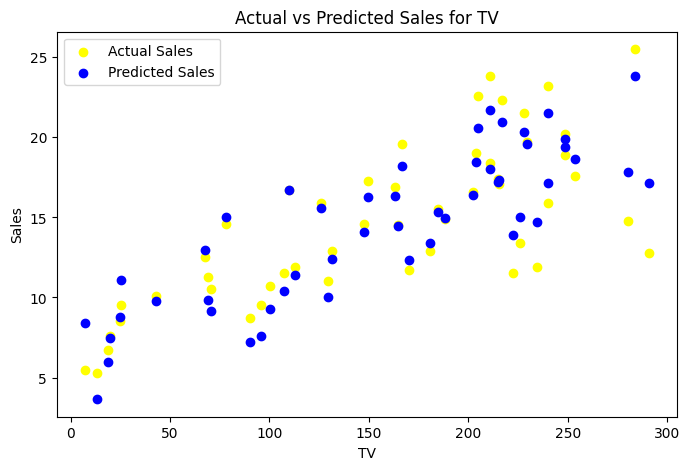

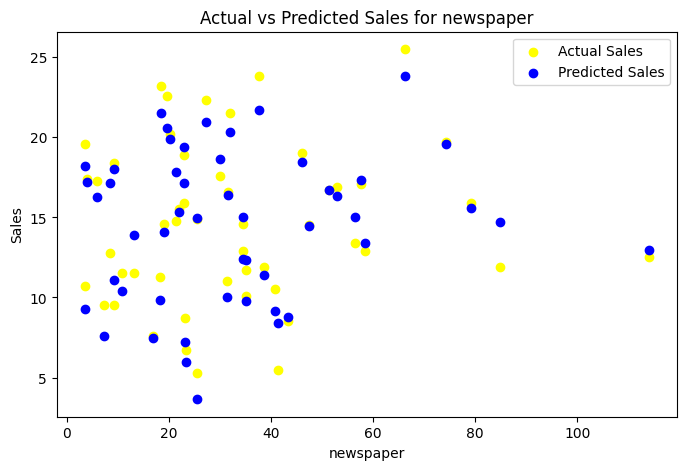

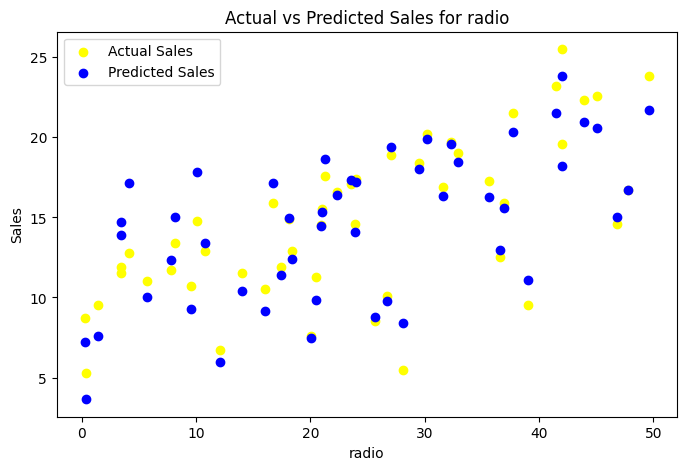

In [19]:

loss = y_test - y_pred


print("Predicted sales:", y_pred, "\n")
print("Actual sales:", y_test, "\n")
print("Loss (Actual - Predicted):", loss, "\n")


features = ["TV", "newspaper", "radio"]
for i, feature in enumerate(features, start=1):
    plt.figure(figsize=(8, 5))
    plt.scatter(X_test[:, i], y_test, color="yellow", label="Actual Sales")
    plt.scatter(X_test[:, i], y_pred, color="blue", label="Predicted Sales")
    plt.title(f"Actual vs Predicted Sales for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Sales")
    plt.legend()
    plt.show()
